<a href="https://colab.research.google.com/github/AlexandreBourrieau/ML/blob/main/Carnets%20Jupyter/VDSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Very Deep Super-Resolution avec le Deep Learning

Description...

In [275]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import glob
from skimage.transform import rescale, resize

# Téléchargement et chargement des données

Le nombre de données est très grand, le fichier contient 20 000 images et sa taille est d'environ 1,6 Go

In [ ]:
!wget "http://www-i6.informatik.rwth-aachen.de/imageclef/resources/iaprtc12.tgz"
!tar xzf iaprtc12.tgz

In [ ]:
!ls iaprtc12/images/ -l

Affichage d'une image aléatoire dans le répertoire /images/39/

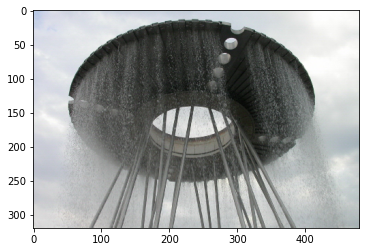

In [189]:
fichier = "iaprtc12/images/39/39"+str(int((random.randrange(0,1000))))+".jpg"
img=mpimg.imread(fichier)
plt.imshow(img)

In [ ]:
img

Chargement des images contenues dans le répertoire /images/39/

In [190]:
def ChargementImages(repertoire):
  images = []
  fichiers = glob.glob(repertoire+"*.jpg")
  for fichier in fichiers:
      img = mpimg.imread(fichier)
      images.append(img)
  return np.array(images)

In [191]:
images = ChargementImages("iaprtc12/images/39/")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [192]:
images.shape

(916,)

In [ ]:
print(images[0].shape)
images[0]

# Préparation des données d'entrainement

Chaque échantillon d'entrainement doit contenir :
 - X : Le canal de luminance de l'image basse résolution traitée par interpolation bicubique : Ybr
 - Y : L'image résiduelle : Yresiduelle = Yhr - Ybr (différence entre la luminance de l'image haute résolution et la luminance de l'image basse résolution traitée par interpolation bicubique)  

**Création des données X : Luminances après interpolation bicubique sur les images en basse résolution**

Conversion des images au format YCbCr :

In [313]:
def rgb2ycbcr(img):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = img.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

In [314]:
images_YCbCr = []
for img in images:
  images_YCbCr.append(rgb2ycbcr(img))
images_YCbCr = np.array(images_YCbCr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [316]:
images_YCbCr[0].shape

(320, 480, 3)

Application d'un facteur d'échelle aléatoire :

In [318]:
Facteurs = [2,3,4]

images_YCbCr_resize=[]

for img in images:
  FacteurEchelle = random.randrange(min(Facteurs),max(Facteurs)+1)
  images_YCbCr_resize = resize(img,(img.shape[0]//FacteurEchelle,img.shape[1]//FacteurEchelle))

Text(0.5, 1.0, 'Image YCbCr redimensionnée')

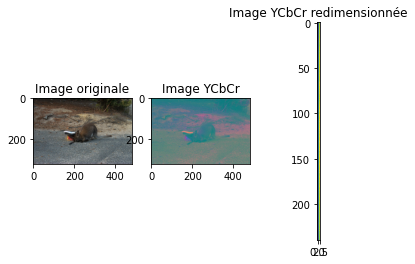

In [319]:
fig, axes = plt.subplots(nrows=1, ncols=3)
ax = axes.ravel()
ax[0].imshow(images[0])
ax[0].set_title("Image originale")

ax[1].imshow(images_YCbCr[0])
ax[1].set_title("Image YCbCr")

ax[2].imshow(images_YCbCr_resize[0])
ax[2].set_title("Image YCbCr redimensionnée")

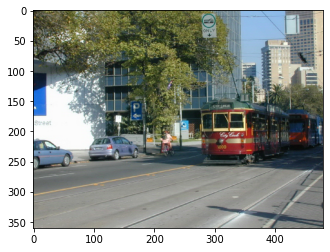

In [290]:
plt.imshow(images[1])

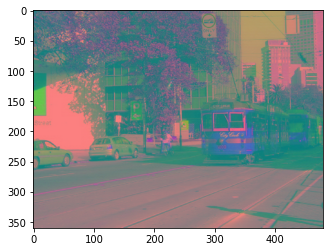

In [291]:
plt.imshow(images_YCbCr[1])

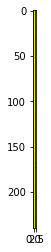

In [292]:
plt.imshow(images_YCbCr_resize[1])

**Création des données Y : Luminances des images résiduelles**